In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
import time 
import numpy as np
import matplotlib.animation as animation
%matplotlib inline
from scipy import signal
import pprint
import math
from sklearn.metrics import mean_squared_error
import scipy.optimize as optimize
import scipy.io as sio

* include more cells modify source so that it works for more cells  "done"
* how to characterise spatial patterns 
* find readout "done"
* auto correlation power spectral density quality factor 
* statistics for characterizing patterns
* power spectral density applications in . biology patterns 

In [415]:
def listRightIndex(alist, value):
    return len(alist) - alist[-1::-1].index(value) -1

def return_heaviside(n_c, n_t, dx, dt, v_0):
    ha2d = np.ones((n_c, n_t))
    for i in range(n_t):
        for j in range(n_c):
            ha2d[j][i] = int((j*dx - v_0*i*dt)>0)
    return ha2d

def closest_time(u, u_0, t):
    vals = list((u-u_0)**2)
    val = min(vals)
    return int(listRightIndex(vals, val)/2)

In [416]:
c = 8
n_t = c*200
dt = 0.05
gamma1 = 18
n = 8
m = 8
tau_2 = 5
k = 5
gamma2 = 1
n_c = 100
dx = 1.5
v_0 = 2.5
tau_d = 7
P_u = 1/tau_2
beta = 0.05
u_0 = 0.99

In [417]:
u2d = np.ones((n_c, n_t))
w2d = np.zeros((n_c, n_t))
r2d = np.zeros(n_c)
t = np.asarray([i*dt for i in range(n_t)])
x_ = np.asarray([i*dx for i in range(n_c)])
ha2d = return_heaviside(n_c, n_t, dx, dt, v_0)

In [418]:
for i in range(n_t-1):
    for cell in range(1, n_c-1):
        u2d[cell][i+1] = u2d[cell][i] + dt*(-u2d[cell][i]*(1/tau_2)+ P_u*ha2d[cell][i])
        c = beta*(w2d[cell-1][i]+w2d[cell+1][i])
        if (i - tau_d >= 0):
            w2d[cell][i+1] = w2d[cell][i] + dt*(-w2d[cell][i] + gamma1*(u2d[cell][i]**n/(u2d[cell][i]**n+1))*(1/(1+w2d[cell][i-tau_d]**m))+c   )
        else:
            w2d[cell][i+1] = w2d[cell][i] + dt*(-w2d[cell][i] + gamma1*(u2d[cell][i]**n/(u2d[cell][i]**n+1))*(1) + c)

In [419]:
for cell in range(1, n_c-1):
    r2d[cell]  = w2d[cell][closest_time(u2d[cell], u_0, t)]


In [428]:
loc = 99

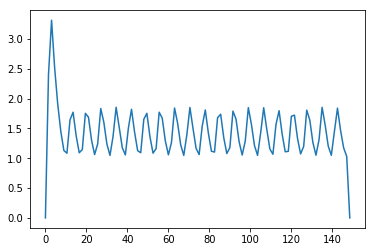

In [429]:
plt.plot(x_, r2d)


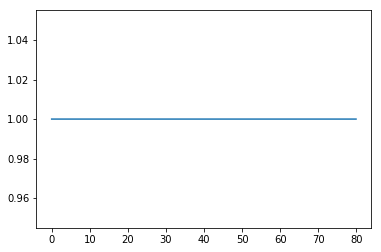

In [430]:
plt.plot(t, u2d[loc, :])


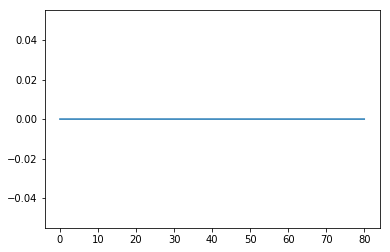

In [431]:
plt.plot(t, w2d[loc, :])


In [126]:
def save_animation(filename, animation_object):# supported format is mp4
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
    animation_object.save(filename, writer=writer)

fig = plt.figure()
ax = plt.axes(xlim=(0, 2*x_[-1]), ylim=(np.amin(w2d),1.2*np.amax(w2d)))
ax.set_ylabel("w")
ax.set_xlabel("cell_index_i")
fig.tight_layout()
line, = ax.plot([], [], color='steelblue', lw=2)

def update(num, u, line):
    line.set_data(x_, u[:, num])
    return line,

ani = animation.FuncAnimation(fig, update, n_c, fargs=[ w2d, line],
                              interval=40, blit=True)
plt.show()

In [181]:
#save_animation("w2d.mp4", ani)

In [ ]:
"""
u = np.zeros((n_t))
ha = np.zeros((n_t))

w = np.zeros(( n_t))
cell_pos = 5


for i in range (n_t-1):
    u[i+1] = u[i] + dt*(-u[i]/tau_2 + gamma2)
    if (i - tau_d >= 0):
        w[i+1] = w[i] + dt*(-w[i] + gamma1*(u[i]**n/(u[i]**n+1))*(1/(1+w[i-tau_d]**m))    )
    else:
        w[i+1] = w[i] + dt*(-w[i] + gamma1*(u[i]**n/(u[i]**n+1))*(1)    )

for i in range(n_t):
    ha[i] = int((cell_pos - v_0*i*dt)>0)
        
plt.plot(t, u)
"""